In [1]:
import sys 
sys.path.append('..')
from qiskit import IBMQ
#### IBMQ(https://quantum-computing.ibm.com/) account might be necessary 
# please type your account 
#IBMQ.save_account('account')

In [4]:
# math tools
import numpy as np 
from scipy import stats 
import os
import copy
# class
from argparse import Namespace

# neural net 
import torch 
import torch.nn as nn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from neural.net import VonNeumannEP, train, validate

# iteration
from tqdm.notebook import tqdm


## xxzchain 
from xxzchain.xxzchain import groundXXZ, entangleandvislist, xxzansatz

# quantum circuit 
from qiskit import Aer
backend = Aer.get_backend("aer_simulator") # set simulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.algorithms.optimizers import COBYLA, ADAM, SLSQP, SPSA, GradientDescent
from qiskit.quantum_info import random_statevector, random_density_matrix, Statevector
from qiskit.circuit.library import EfficientSU2
## custom lib 
from cirquit.tools import data_processing, initial_entangle_EP
from cirquit.CircuitModelMk4 import HybridCircuit

#from qiskit import tools
from qiskit import quantum_info
import qutip as qt

# graph tool 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# date for mkdir 
from datetime import date

import time

In [5]:
import pickle
def save_obj(obj, name ):
    """
    inputs
    obj 
    name string
    """
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
qubits8arxiv005mag = [0, 0.5, 1.2, 1.5, 2, 2.15, 2.5, 3.0]
qubits8arxiv005exact =[1.0166576561462088, 0.9885414399343738, 0.9885414399343738, 0.8912056679808481, 0.6615632381579821, 0.0, 0.0, 0.0]
detailqubit8arxiv005mag = [0.0, 0.15, 0.3, 0.31, 0.3422222222222222, 0.37444444444444447, 0.4066666666666667, 0.4388888888888889, 0.4711111111111111, 0.5033333333333333, 0.5355555555555556, 0.5677777777777777, 0.6, 0.61, 0.8049999999999999, 1.0, 1.01, 1.0533333333333332, 1.0966666666666667, 1.14, 1.1833333333333333, 1.2266666666666666, 1.27, 1.3133333333333332, 1.3566666666666665, 1.4, 1.41, 1.4633333333333332, 1.5166666666666666, 1.5699999999999998, 1.6233333333333333, 1.6766666666666665, 1.73, 1.7833333333333332, 1.8366666666666664, 1.89, 1.9, 1.9666666666666666, 2.033333333333333, 2.1, 2.1666666666666665, 2.2333333333333334, 2.3, 2.3666666666666667, 2.4333333333333336, 2.5, 2.51, 3.0]
detailqubit8arxiv005exact  =[1.0166576561462088, 1.0166576561462088, 1.0166576561462088, 1.016657656146209, 1.0166576561462097, 1.016657656146209, 1.016657656146209, 0.988541439934374, 0.988541439934374, 0.9885414399343738, 0.9885414399343745, 0.9885414399343737, 0.9885414399343738, 0.988541439934374, 0.9885414399343737, 0.988541439934374, 0.9885414399343742, 0.9885414399343742, 0.988541439934374, 0.9885414399343742, 0.9885414399343738, 0.8912056679808493, 0.8912056679808484, 0.8912056679808513, 0.8912056679808493, 0.8912056679808502, 0.8912056679808509, 0.8912056679808489, 0.8912056679808505, 0.8912056679808502, 0.8912056679808518, 0.891205667980848, 0.89120566798085, 0.8912056679808507, 0.6615632381579816, 0.661563238157983, 0.6615632381579806, 0.6615632381579825, 0.6615632381579815, 0.6615632381579831, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [18]:
from os import walk


# old data for 3 qubits ! 
mypathlist = ['../notebooks/data/arXiv/QNEE3qubits/XXZmu0.0delta0.05threemk4_NQ3_s0_reps8',
              '../notebooks/data/arXiv/QNEE3qubits/XXZmu0.5delta0.05threemk4_NQ3_s0_reps8',
              '../notebooks/data/arXiv/QNEE3qubits/XXZmu1.0delta0.05threemk4_NQ3_s0_reps8',
              '../notebooks/data/arXiv/QNEE3qubits/XXZmu1.5delta0.05threemk4_NQ3_s0_reps8',
              '../notebooks/data/arXiv/QNEE3qubits/XXZmu2.0delta0.05threemk4_NQ3_s0_reps8',
              '../notebooks/data/arXiv/QNEE3qubits/XXZmu2.5delta0.05threemk4_NQ3_s0_reps8',
              '../notebooks/data/arXiv/QNEE3qubits/XXZmu3.0delta0.05threemk4_NQ3_s0_reps8']
maglist = []
min_EPlist = []
mean_EPlist = []
std_EPlist = []
exact_EPlist = []
exact_eigenlist = []
QNEEP_low_eigen_list = []
for mypath in mypathlist:
    print(mypath)
    fnames = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        fnames.extend(filenames)
        break
    temparray = []
    exactanswer = []
    temp_eigen = [] 
    for i in fnames:
        temp_name = mypath + '/' + i[:-4]
        file_obj = load_obj(temp_name)
        file_obj.inter_ent_list.insert(0,file_obj.ini_loss_list[-1])
        lowEP = np.array(file_obj.inter_ent_list).min()
        temparray.append(lowEP)
        exactanswer.append(file_obj.entangle_EP)
    for i in fnames:
        temp_name = mypath + '/' + i[:-4]
        file_obj = load_obj(temp_name)
        file_obj.inter_ent_list.insert(0,file_obj.ini_loss_list[-1])
        file_obj.inter_eigenvals_list.insert(0,file_obj.ini_eigenval)
        low_idx = np.where( np.array(file_obj.inter_ent_list) == np.array(file_obj.inter_ent_list).min())[0][0]
        low_eigenvalues = file_obj.inter_eigenvals_list[low_idx]
        temp_eigen.append(low_eigenvalues)

    
    maglist.append(file_obj.mag)
    min_EPlist.append(np.array(temparray).min())
    mean_EPlist.append(np.array(temparray).mean())
    exact_EPlist.append(file_obj.entangle_EP)
    exact_eigenlist.append(file_obj.eigenvalues) #? 
    std_EPlist.append(np.array(temparray).std())
    low_idx = np.where( np.array(temparray) == np.array(temparray).min())[0][0]
    QNEEP_low_eigen_list.append(temp_eigen[low_idx])


../notebooks/data/arXiv/QNEE3qubits/XXZmu0.0delta0.05threemk4_NQ3_s0_reps8
../notebooks/data/arXiv/QNEE3qubits/XXZmu0.5delta0.05threemk4_NQ3_s0_reps8
../notebooks/data/arXiv/QNEE3qubits/XXZmu1.0delta0.05threemk4_NQ3_s0_reps8
../notebooks/data/arXiv/QNEE3qubits/XXZmu1.5delta0.05threemk4_NQ3_s0_reps8
../notebooks/data/arXiv/QNEE3qubits/XXZmu2.0delta0.05threemk4_NQ3_s0_reps8
../notebooks/data/arXiv/QNEE3qubits/XXZmu2.5delta0.05threemk4_NQ3_s0_reps8
../notebooks/data/arXiv/QNEE3qubits/XXZmu3.0delta0.05threemk4_NQ3_s0_reps8


In [17]:
maglist = []
#QNEEP_EPlist = []
VQSE_EPlist = []
exactEPlist =[]

#QNEEP_EPmeanlist = []
VQSE_EPmeanlist = []


VQSE_EPstdlist = []
low_eigen_list = []
exact_eigenlist =[]
# three qubits  
for idx, magfield in enumerate([0.0,0.5,1.0,1.5,2.0,2.5,3.0]):
    test = load_obj( '../notebooks/data/arXiv/VQSE3qubits/Finite_VQSE_{}qubits_XXZdelta{}mag{}trial{}'.format(
                     3, 0.05,magfield, idx ))
    # unpack QNEEP data 
    reduced_state = quantum_info.partial_trace(test.ini_state,
                                               list(np.arange(test.n_qubit,test.num_ini_qubit) )
                                               )
    EP2 = quantum_info.entropy(reduced_state, base = np.e) 
    exact_eigenlist.append(test.eigenvalue_list )
    Elist = []
    EPlist = []
    Eigenlist = []
    for i in test.VQSE_trial_list:
        Elist.append(i[0])
        EPlist.append(i[-1])
        Eigenlist.append(i[2])
    Elist = np.array(Elist)
    VQmean = np.array(EPlist).mean()
    VQstd = np.array(EPlist).std()
    
    smallEidx = np.where(Elist == Elist.min() )
    E,exact_learning_curve,largeproplist,_, VQSEEP = test.VQSE_trial_list[smallEidx[0].squeeze()]
    print('exact EP', EP2)
    print('EP estimated by VQSEEP',VQSEEP)
    

    maglist.append(test.mag)
    VQSE_EPlist.append(VQSEEP)
    exactEPlist.append(EP2)
    VQSE_EPmeanlist.append(VQmean)
    low_eigen_list.append(largeproplist)

    VQSE_EPstdlist.append(VQstd)

exact EP 1.0166576561462088
EP estimated by VQSEEP 1.2577445407032912
exact EP 0.9885414399343738
EP estimated by VQSEEP 1.1572586862300465
exact EP 0.988541439934374
EP estimated by VQSEEP 1.140620836763721
exact EP 0.8912056679808481
EP estimated by VQSEEP 1.124852532760078
exact EP 0.6615632381579821
EP estimated by VQSEEP 0.9989643083822882
exact EP 0.0
EP estimated by VQSEEP 0.00419507506525406
exact EP 0.0
EP estimated by VQSEEP 0.0023242789323675425


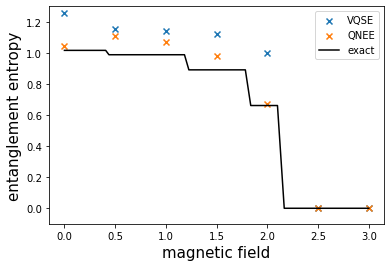

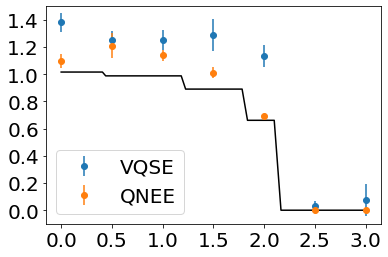

In [15]:
#plt.title(r'lowest cost function among $5$ trials')
#plt.scatter(maglist, exact_EPlist, label =r'exact',c='k',marker='+')
plt.scatter(maglist,VQSE_EPlist, label=r'VQSE',marker='x')
plt.scatter(maglist, min_EPlist, label =r'QNEE',marker='x')
plt.plot(detailqubit8arxiv005mag ,detailqubit8arxiv005exact , label =r'exact',color='k')
plt.ylabel(r'entanglement entropy',size = 15)
plt.xlabel(r'magnetic field',size = 15)
plt.ylim(-0.1,1.3)
plt.legend()

plt.show()


plt.errorbar(maglist, VQSE_EPmeanlist, yerr=VQSE_EPstdlist,fmt='o', label = r'VQSE')
plt.errorbar(maglist, mean_EPlist, yerr = std_EPlist, label =r'QNEE',fmt='o')
plt.plot(detailqubit8arxiv005mag ,detailqubit8arxiv005exact , color='k')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ylabel(r'entanglement entropy',size = 15)
#plt.xlabel(r'magnetic field',size = 15)
plt.ylim(-0.1,1.5)
plt.legend(fontsize='20')


plt.show()

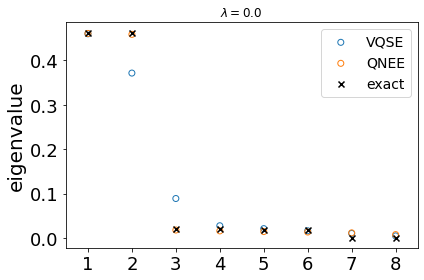

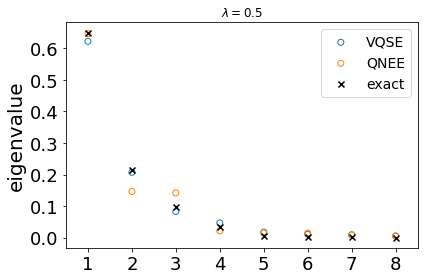

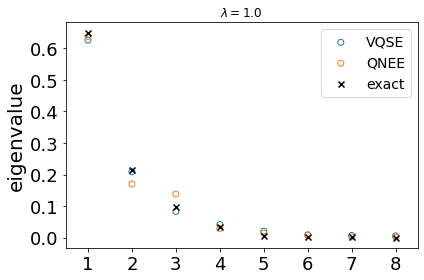

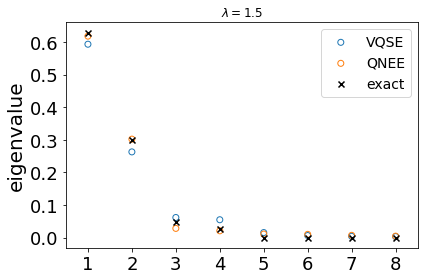

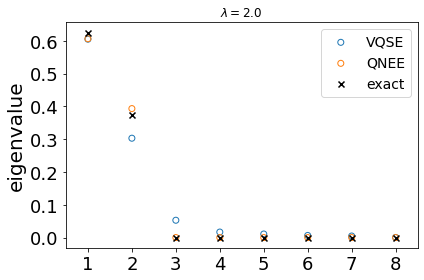

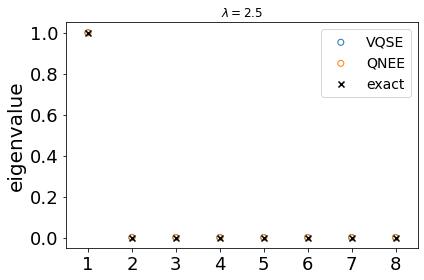

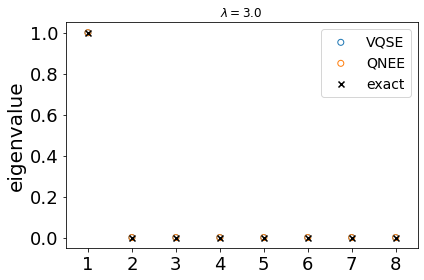

In [19]:
# Eigenvalues are computed based on counting method. 
# Instead you can use outputs of the NN, which is save in the loaded pkl files.

for idx, cont in enumerate(QNEEP_low_eigen_list):
    
    ent = 0
    for i in cont:
        ent+= -i*np.log(i)
    plt.title(r'$\lambda=$'+str(maglist[idx]))
    plt.ylabel(r'eigenvalue',size = 20)
    VQSE_cont = low_eigen_list[idx]
    if len(VQSE_cont) != 8:
        VQSE_cont = np.append(VQSE_cont, np.zeros(8-len(VQSE_cont)) )
    if len(cont) != 8:
        cont = np.append(cont, np.zeros(8-len(cont)) )
    plt.scatter(np.arange(len(VQSE_cont))+1, VQSE_cont, facecolors='none', edgecolors='C0', label =r'VQSE')
    plt.scatter(np.arange(len(cont))+1, cont, facecolors='none', edgecolors='C1', label =r'QNEE')
    plt.scatter(np.arange(len(exact_eigenlist[idx]))+1, exact_eigenlist[idx],marker='x',c='k', label =r'exact')
    plt.xlim(0.5,8.5)
    #plt.ylim(-0.02,1.02)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()